
*Social Computing Big Data Laboratory - 2022*

----

##Artificial Neural Network

Artificial neural networks (ANN) or connectionist systems are computing systems that are inspired by, but not necessarily identical to, the biological neural networks that constitute animal brains. [*WIkipedia*](https://en.wikipedia.org/wiki/Artificial_neural_network). 

In this practice, we will keep working on the Telco Cutomer Churn Dataset. 



### Import Package

Pertama-tama, kita melakukan import package seperti biasa

In [1]:
# Import Library
import pandas as pd 

#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# Split Data
from sklearn.model_selection import train_test_split, cross_val_score

# Import Library
from sklearn.neural_network import MLPClassifier

### Exploration Data

In [2]:
#Import Dataset
from google.colab import files
uploaded = files.upload()

Saving Churn_Transformed_New.csv to Churn_Transformed_New.csv


In [4]:
df_customer= pd.read_csv('Churn_Transformed_New.csv', sep=',',)

In [5]:
# Show 10 first Row
df_customer.head()

,Unnamed: 0,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,...,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,1,1,...,0,1,0,1,0,0,1,2985,2985.0,0
1,1,1,0,0,1,1,0,0,1,34,...,1,0,1,0,0,1,0,5695,18895.0,0
2,2,1,0,0,1,1,0,0,1,2,...,0,1,0,1,0,1,0,5385,10815.0,1
3,3,1,0,0,1,1,0,0,1,45,...,1,0,1,0,0,1,1,423,184075.0,0
4,4,0,1,0,1,1,0,0,1,2,...,0,1,0,1,0,0,1,707,15165.0,1


there is an Unnamed column, we have to remove it.

In [9]:
# Remove "Unnamed:O" Column
df_cust1 = df_customer.drop("Unnamed: 0", axis=1)
df_cust1.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,1,1,0,...,0,1,0,1,0,0,1,2985,2985.0,0
1,1,0,0,1,1,0,0,1,34,1,...,1,0,1,0,0,1,0,5695,18895.0,0
2,1,0,0,1,1,0,0,1,2,1,...,0,1,0,1,0,1,0,5385,10815.0,1
3,1,0,0,1,1,0,0,1,45,0,...,1,0,1,0,0,1,1,423,184075.0,0
4,0,1,0,1,1,0,0,1,2,1,...,0,1,0,1,0,0,1,707,15165.0,1


In [ ]:
df_cust1 = df_customer.drop(columns=['gender_0', 'gender_1'])
df_cust1.head(10)

In [ ]:
# Remove "Gender" Column *Khusus Dataset_ANN (Tugas)*
df_cust1 = df_customer.drop("gender_0" , axis=1)
df_cust1.head(10)

In [10]:
# Check the Data Infomation
df_cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender_0            7043 non-null   int64  
 1   gender_1            7043 non-null   int64  
 2   SeniorCitizen_0     7043 non-null   int64  
 3   SeniorCitizen_1     7043 non-null   int64  
 4   Partner_0           7043 non-null   int64  
 5   Partner_1           7043 non-null   int64  
 6   Dependents_0        7043 non-null   int64  
 7   Dependents_1        7043 non-null   int64  
 8   tenure              7043 non-null   int64  
 9   PhoneService_0      7043 non-null   int64  
 10  PhoneService_1      7043 non-null   int64  
 11  MultipleLines_0     7043 non-null   int64  
 12  MultipleLines_1     7043 non-null   int64  
 13  MultipleLines_2     7043 non-null   int64  
 14  InternetService_0   7043 non-null   int64  
 15  InternetService_1   7043 non-null   int64  
 16  Intern

### Create Model Artificial Neural Network

Min max scaller digunakan untuk scalling data atau membuat data berada pada rentang 0 -1. Tujuannya adalah dengan melakukan normalisasi data, model dapat belajar dengan lebih cepat dan meningkatkan akurasi model.

In [11]:
#Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

# initialize min-max scaler
# Merubah 'Churn' menjadi 'Exited'
mm_scaler = MinMaxScaler()
column_names = df_cust1.columns.tolist()
column_names.remove('Churn')


# Transform all attributes
df_cust1[column_names] = mm_scaler.fit_transform(df_cust1[column_names])
df_cust1.sort_index(inplace=True)
df_cust1.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.013889,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.250169,0.003420,0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.472222,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.478745,0.021766,0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.452598,0.012449,1
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.625000,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.034076,0.212235,0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.058030,0.017465,1


In [12]:
# Selecting the Feature, by remove the unused feature 
feature = ['Churn']
train_feature = df_cust1.drop(feature, axis=1)

# Merubah 'Churn' menjadi 'Exited'

# Set The Target
train_target = df_cust1["Churn"]

Memilih data feature dan Target sebagai data train dan data test. 
Data train digunakan untuk membentuk modelnya sedangkan data test digunakan untuk menguji modelnya

Untuk data featurenya kita memakai semua variabel kecuali churn.Sehingga pada saat mengatur eature kita hapus kolom tersebut.
Sedangkan untuk targetnya kita pakai data churnnya. 

In [ ]:
# Show the Feature
train_feature.head(5)

,Unnamed: 0,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,PhoneService_1,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges
0,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.013889,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.250169,0.003420
1,0.000142,0.0,1.0,1.0,0.0,0.0,1.0,0.472222,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.478745,0.021766
2,0.000284,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.452598,0.012449
3,0.000426,0.0,1.0,1.0,0.0,0.0,1.0,0.625000,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.034076,0.212235
4,0.000568,0.0,1.0,1.0,0.0,0.0,1.0,0.027778,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.058030,0.017465


In [14]:
# Show the Target 
train_target.head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    0
7    0
8    1
9    0
Name: Churn, dtype: int64

In [15]:
#Split Data 70:30
X_train, X_test, y_train, y_test = train_test_split(train_feature ,train_target, shuffle = True, test_size=0.3, random_state=1)

 split data testing (30%) dan data training sebesar 70%

In [16]:
# Show the training data
X_train.head()

,gender_0,gender_1,SeniorCitizen_0,SeniorCitizen_1,Partner_0,Partner_1,Dependents_0,Dependents_1,tenure,PhoneService_0,...,Contract_0,Contract_1,Contract_2,PaperlessBilling_0,PaperlessBilling_1,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,MonthlyCharges,TotalCharges
5925,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.277778,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.056343,0.016308
4395,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.958333,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.875169,0.085848
1579,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.166667,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.676957,0.010935
1040,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.194444,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.761302,0.014578
1074,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.013889,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.016194,0.000221


To train the ANN Model.We will use the MLPClassifier from Scikit Learn Library. The full documentation can be seen [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). Below is the default parameter:

`sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)`

In [17]:
# Fitting Model
mlp = MLPClassifier(hidden_layer_sizes=(5), 
                    activation = 'relu',
                    solver = 'adam',
                    max_iter= 10000, 
                    verbose = True, 
                    random_state=1)
mlp = mlp.fit(X_train,y_train)

# Prediction to Test Dataset
y_predmlp = mlp.predict(X_test)

Iteration 1, loss = 0.77336332
Iteration 2, loss = 0.66423037
Iteration 3, loss = 0.58864615
Iteration 4, loss = 0.55663533
Iteration 5, loss = 0.54341773
Iteration 6, loss = 0.53172897
Iteration 7, loss = 0.52018350
Iteration 8, loss = 0.50896731
Iteration 9, loss = 0.49834399
Iteration 10, loss = 0.48793057
Iteration 11, loss = 0.47882895
Iteration 12, loss = 0.47122653
Iteration 13, loss = 0.46515437
Iteration 14, loss = 0.46048155
Iteration 15, loss = 0.45689087
Iteration 16, loss = 0.45408281
Iteration 17, loss = 0.45182967
Iteration 18, loss = 0.44947814
Iteration 19, loss = 0.44769687
Iteration 20, loss = 0.44611892
Iteration 21, loss = 0.44471826
Iteration 22, loss = 0.44355032
Iteration 23, loss = 0.44249098
Iteration 24, loss = 0.44117077
Iteration 25, loss = 0.44022883
Iteration 26, loss = 0.43957371
Iteration 27, loss = 0.43844515
Iteration 28, loss = 0.43751387
Iteration 29, loss = 0.43678792
Iteration 30, loss = 0.43600278
Iteration 31, loss = 0.43549342
Iteration 32, los

MLP Classifier MLPClassifier adalah singkatan dari Multi-layer Perceptron classifier yang dalam namanya terhubung ke Neural Network.

In [19]:
print('Number of Layer =', mlp.n_layers_)
print('Number of Iteration =', mlp.n_iter_)
print('Current loss computed with the loss function =', mlp.loss_)

Number of Layer = 3
Number of Iteration = 225
Current loss computed with the loss function = 0.4169070726324682


### Create Confussion Matrix

Since it was the classification problem, we can evaluate the model using Confussion Matrix

In [20]:
# Import the metrics class
from sklearn import metrics
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

In [ ]:
#Confussion Matrix 
cnf_matrixmlp = metrics.confusion_matrix(y_test, y_predmlp)
list1 = ["Actual Churn", "Actual NoChurn"]
list2 = ["Predicted Churn", "Predicted NoChurn"]
pd.DataFrame(cnf_matrixmlp, list1,list2)

#Pada Dataset_ANN Rubah list 1 menjadi "Actual Exited dst"
#List 2 menjadi "Predicted Exited"

,Predicted Churn,Predicted NoChurn
Actual Churn,1398,187
Actual NoChurn,227,301


In [ ]:
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


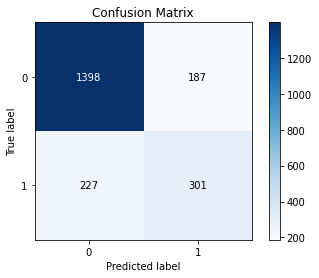

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_predmlp)

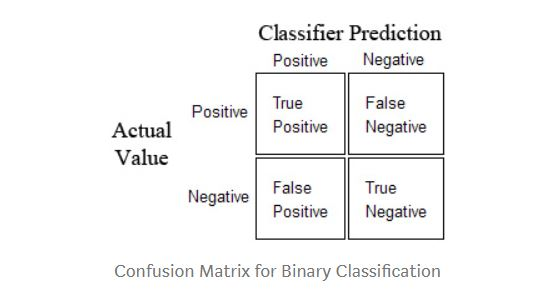 

 

* True Positive (TP): Outcome where the model correctly predicts the positive class.
* True Negative (TN): Outcome where the model correctly predicts the negative class.
* False Positive (FP): Also called a type 1 error, an outcome where the model incorrectly predicts the positive class when it is actually negative.
* False Negative (FN): Also called a type 2 error, an outcome where the model incorrectly predicts the negative class when it is actually positive.

In [ ]:
# Show the Accuracy, Precision, Recall, F1, etc. 
acc_mlp = metrics.accuracy_score(y_test, y_predmlp)
prec_mlp = metrics.precision_score(y_test, y_predmlp)
rec_mlp = metrics.recall_score(y_test, y_predmlp)
f1_mlp = metrics.f1_score(y_test, y_predmlp)
kappa_mlp = metrics.cohen_kappa_score(y_test, y_predmlp)

print("Accuracy:", acc_mlp)
print("Precision:", prec_mlp)
print("Recall:", rec_mlp)
print("F1 Score:", f1_mlp)
print("Cohens Kappa Score:", kappa_mlp)

Accuracy: 0.804070042593469
Precision: 0.6168032786885246
Recall: 0.5700757575757576
F1 Score: 0.5925196850393701
Cohens Kappa Score: 0.4638107730404295
